# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


In [1]:
#Import of libraries

import pandas as pd
import numpy as np
import datetime

import requests
import tweepy
import os
import json

import seaborn as sns
import matplotlib.pyplot as plt

get_ipython().run_line_magic('matplotlib', 'inline')

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Downloaded the WeRateDogs Twitter archive data and uploaded it accordingly.

df_archive = pd.read_csv('Data_Gathering/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Gather the images data from the provided url.

folder_name = 'Data_Gathering'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [4]:
#Convert the images data to a dataframe

df_image = pd.read_csv('Data_Gathering/image-predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# #I was unable to get the Developer access due to not being able to verify my mobile number.
# #The below is the provided code for this step (Commented out to prevent it from running)


# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('Data_Gathering/tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#             print(tweet)
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [6]:
#Convert tweets data from file to a list

tweet_list = []
with open('Data_Gathering/tweet_json.txt') as file:
    tweets = [json.loads(line) for line in file.readlines() ]
    for tweet in tweets:
        tweet_list.append({'tweet_id': tweet['id'],
                        'retweet_count': tweet['retweet_count'], 
                        'favorite_count': tweet['favorite_count']})

In [7]:
#Create a dataframe from tweet_list list of dictionaries

df_tweets = pd.DataFrame(tweet_list, columns = ['tweet_id', 
                                                'retweet_count', 
                                                'favorite_count'])

## Assessing Data
In this section, we will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 

**The below are key points provided in this project and kept for reference purposes:** 

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
#Generate the ARCHIVE dataset

df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
#Generate the IMAGE dataset

df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [10]:
#Generate the TWEETS dataset

df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [11]:
#Let's look at the info for the ARCHIVE dataset

df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
#Let's look at the info for the IMAGE dataset

df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#Let's look at the info for the TWEETS dataset

df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
#Let's get a description of the ARCHIVE dataset

df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
#Let's get a description of the IMAGE dataset

df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
#Let's get a description of the TWEETS dataset

df_tweets.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [17]:
#Generate a random sample of items to explore if there are any potential quality issues.

df_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1059,741743634094141440,NaN,NaN,2016-06-11 21:27:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Aqua. She's a sandy pupper. Not sure how ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741743634...,11,10,Aqua,None,None,pupper,None
259,843235543001513987,NaN,NaN,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tycho. She just had new wheels install...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843235543...,13,10,Tycho,None,None,None,None
681,788765914992902144,NaN,NaN,2016-10-19 15:37:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Butter. She can have whatever she want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/788765914...,12,10,Butter,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a Byzantine Rigatoni. Very aerodyn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677187300...,9,10,None,None,None,None,None


In [18]:
#Generate a random sample of items to explore if there are any potential quality issues.

df_image.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
616,680191257256136705,https://pbs.twimg.com/media/CXCGVXyWsAAAVHE.jpg,1,Brittany_spaniel,0.733253,True,Welsh_springer_spaniel,0.251634,True,English_springer,0.009243,True
1066,715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True
691,684200372118904832,https://pbs.twimg.com/media/CX7EkuHWkAESLZk.jpg,1,llama,0.681347,False,ram,0.120142,False,hog,0.043686,False
1146,730573383004487680,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,2,American_Staffordshire_terrier,0.810158,True,Labrador_retriever,0.058205,True,Weimaraner,0.027930,True
1227,745314880350101504,https://pbs.twimg.com/media/Clfj6RYWMAAFAOW.jpg,2,ice_bear,0.807762,False,great_white_shark,0.027040,False,fountain,0.022052,False


In [19]:
#Generate a random sample of items to explore if there are any potential quality issues.

df_tweets.sample(5)

,tweet_id,retweet_count,favorite_count
1985,672877615439593473,405,1096
1741,679405845277462528,1364,2594
45,883360690899218434,3825,22986
1614,685198997565345792,764,2566
457,817908911860748288,906,5356


In [20]:
#Find common column/s 

all_columns = pd.Series(list(df_archive) + list(df_image) +list(df_tweets))
all_columns[all_columns.duplicated()]

#Result being the tweet_id column

17    tweet_id
29    tweet_id
dtype: object

### Quality issues

**df_archives**
1. Timestamp column format to be changed to a date format.

2. Ratings have no common denominator, so we need to realign all ratings.
    <br>e.g. 84/70 needs to be adjusted to 12/10 so that all denominators are 10.

3. There are rows with missing or inaccurate ratings, which we can possibly update from the text column, otherwise, we will need to remove it.

4. Remove all retweets as this will just skew the results.

**df_image**
5. Remove all items where the image has not been identified as a dog.
    <br>e.g. p1_dog & p2_dog & p3_dog = False

6. Add a column to get the best match (highest %) form p1_conf, p2_conf or p3_conf where it is identified as a dog (in columns p1_dog, p2_dog and p3_dog).

7. No consistency in the use of capital letters for the dog breeds in columns p1_dog, p2_dog and p3_dog. 

8. The img_num column in same rows refers to multiple images, however, there is only one url link in the jpg_url column.

**df_tweets**
1. No quality issues noted.

### Tidiness issues
1. Unnecessary columns to be removed.

2. All three dataframes should be joined using the tweet_id column.

3. Remove any NaN values df_clean data i.e. where tweet_ids from the Images and Tweets dateframes did not exist in the Archive dataframe.

## Cleaning Data

In [21]:
# Make copies of original pieces of data

df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

### Issue #1:
**df_archives** - Timestamp column format to be changed to a date format.

#### Define:
Change the datatype of the timestamp column from "object" to "datetime64". 

#### Code

In [22]:
#We will fix the release date column

df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

#### Test

In [23]:
#Let's reassess the info for the dataset

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:
**df_archives** - Ratings have no common denominator, so we need to realign all ratings.

#### Define
Normalise the ratings so that they all have a common denominator (rounded to the nearest interger) by multiplying the rating_numerator by 10 and dividing that by the rating denominator (similar can be done with the denominator, but is not necessary as the result should be 10 for all rows).

#### Code

In [24]:
#Get a list of the unique rating_numerators (prior to cleanup)

df_archive_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [25]:
#Let's realign the rating_numerator to ensure that all ratings share a common denominator

df_archive_clean['rating_numerator'] = round((df_archive_clean['rating_numerator'] * 10) / df_archive_clean['rating_denominator'],0)
df_archive_clean['rating_numerator'].replace([np. inf, -np. inf], 0, inplace=True)
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].fillna(0)
df_archive_clean['rating_numerator'] = df_archive_clean['rating_numerator'].astype(int)

#This is not necessary since we are making all denominators = 10
df_archive_clean['rating_denominator'] = (df_archive_clean['rating_denominator'] * 10) / df_archive_clean['rating_denominator']

#### Test

In [26]:
#Get a list of the unique rating_numerators (post cleanup)

df_archive_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,    0,   75,    7,    9,   34,    8,    1,   27,    3,    4,
       1776,    2,   26])

### Issue #3:
**df_archives** - There are rows with missing or inaccurate ratings.

#### Define:
Even after normalising the rating_numerator, there still appears to be inaccuracies (e.g. 1776, etc.) and missing (e.g. 0), however, per inspection of the text column, it was noted that the rating per the text column differs from the rating_numerator and/or rating_denominator. Therefore, extract the rating from the text column, normalise it and compare to the rating_numerator and rating_denominator to extrapolate the most accurate rating per entry.

#### Code

In [27]:
#Extract the rating from the text column (create a column called 'ratings')

df_archive_clean['rating'] = df_archive_clean.text.str.extract('([0-9][0-9].[0-9][0-9])', expand=True)

In [28]:
#Extract the numerator and denumerator from the extracted ratings.

df_archive_clean['rating_num'] = df_archive_clean['rating'].str[:2].fillna(0)
df_archive_clean['rating_denum'] = df_archive_clean['rating'].str[-2:].fillna(0)

In [29]:
#Realign the extract rating numerator so that the extract rating denumerators will have a common denumerator

df_archive_clean['rating_num'] = round((df_archive_clean['rating_num'].astype(int) * 10) / df_archive_clean['rating_denum'].astype(int),0)
df_archive_clean['rating_num'].replace([np. inf, -np. inf], 0, inplace=True)
df_archive_clean['rating_num'] = df_archive_clean['rating_num'].fillna(0)
df_archive_clean['rating_num'] = df_archive_clean['rating_num'].astype(int)

In [30]:
#Compare the ratings to capture the most accurate rating (i.e. revised rating)
#i.e. comparing original rating_numerator to extracted rating numerator (adjusted)

def f(row):
    if row['rating_numerator'] == row['rating_num']:
        return row['rating_numerator']
    else:
        if row['rating_num'] == 0:
            return row['rating_numerator']
        else:
            if pd.isnull(row['rating_num']) == True:
                return row['rating_numerator']
            else:
                return row['rating_num']
            
df_archive_clean['revised_rating_numerator'] = df_archive_clean.apply(f, axis=1)

#### Test

In [31]:
#Previous ratings per the original df_archive data

df_archive_clean['rating_numerator'].unique()

#Per the results below, it is noted that there is a broad scope of ratings 
#(per investigation of some of the data, it was noted that the ratings per the data-set was inaccurrate).

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,    0,   75,    7,    9,   34,    8,    1,   27,    3,    4,
       1776,    2,   26])

In [32]:
#Revised ratings per our quality clean up

df_archive_clean['revised_rating_numerator'].unique()

#The ratings appear to be more consistent and accurate now.

array([13, 12, 14,  5, 17, 11, 10, 20, 66,  6, 15, 82,  0, 75,  7,  9, 34,
        8,  1,  4,  3, 43, 76,  2, 33, 19, 37])

### Issue #4:
**df_archives** - Remove all retweets.

#### Define:
Remove retweet entries (identified by tweet ids in the in_reply_to_status_id and retweeted_status_id columns).

#### Code

In [33]:
#Let's remove retweeted data from the dataset

df_archive_clean = df_archive_clean[df_archive_clean['in_reply_to_status_id'].isnull()]
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]
df_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,rating,rating_num,rating_denum,revised_rating_numerator
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10.0,Phineas,None,None,None,None,13/10,13,10,13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10.0,Tilly,None,None,None,None,13/10,13,10,13
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10.0,Archie,None,None,None,None,12/10,12,10,12
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10.0,Darla,None,None,None,None,13/10,13,10,13
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10.0,Franklin,None,None,None,None,12/10,12,10,12
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,10.0,None,None,None,None,None,13/10,13,10,13
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,10.0,Jax,None,None,None,None,13/10,13,10,13
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,10.0,None,None,None,None,None,13/10,13,10,13
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,10.0,Zoey,None,None,None,None,13/10,13,10,13
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10.0,Cassie,doggo,None,None,None,14/10,14,10,14


#### Test

In [34]:
#Let's confirm that the retweeted data has been removed

df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null float64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
rating                        

### Issue #5:
**df_image** - Remove all items where the image has not been identified as a dog.

#### Define:
Remove entries where the twitter AI has not identified a dog in the tweet image (i.e. False in p1_dog & p2_dog & p3_dog columns).

#### Code

In [35]:
#Compare the image results to extract ONLY dog results
#i.e. p1_dog = True & p2_dog = True & p3_dog = True

def f(row):
    if (row['p1_dog'] | row['p2_dog'] | row['p3_dog']) == True:
        return 'True'
    else:
        return 'False'
            
df_image_clean['is_dog'] = df_image_clean.apply(f, axis=1)

In [36]:
#Remove NONE DOG images from the data set

df_image_clean.drop(df_image_clean[df_image_clean['is_dog'] == 'False'].index, inplace=True)

#### Test

In [37]:
#Let's reassess the df_image_clean data

df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,True


### Issue #6:
**df_image** - Add a column to get the best match (highest %) form p1_conf, p2_conf or p3_conf including the breed.

#### Define:
Create a new column with the confidence level (i.e. from the p1_conf & P2_conf & p3_conf columns) where the respective dog columns are TRUE (and also extract the dog breed identified).

#### Code

In [38]:
#Compare the image results and identify the column with the highest confidence and is a dog and extract the dog breed

def f(row):
    if row['p1_dog'] == True :
        return row['p1_conf']
    else:
        if row['p2_dog'] == True :
            return row['p2_conf']
        else:
            if row['p3_dog'] == True :
                return row['p3_conf']
            else:
                return 0
            
df_image_clean['is_dog_conf'] = df_image_clean.apply(f, axis=1)

In [39]:
#Extract the dog breed to a new column, i.e. get p1 / p2 / p3 where it is a dog
#It has been noted that the confidence levels goes highest to lowest from left to right.

def f(row):
    if row['p1_dog'] == True :
        return row['p1']
    else:
        if row['p2_dog'] == True :
            return row['p2']
        else:
            if row['p3_dog'] == True :
                return row['p3']
            else:
                return 0
            
df_image_clean['is_breed'] = df_image_clean.apply(f, axis=1)

#### Test

In [40]:
#Reassess the df_image_clean dataset

df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,is_dog_conf,is_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,0.560311,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,True,0.651137,Bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True,0.692517,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True,0.007959,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True,0.201493,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True,True,0.775930,golden_retriever


### Issue #7:
**df_image** - No consistency in the use of capital letters for the dog breeds in columns p1_dog, p2_dog and p3_dog.

#### Define:
Ensure that all dog breed names are consistent with having NO capital letters (including the new column created is_breed from above).

#### Code

In [41]:
#let's restate all the data in the dog breed columns to ensure that no text has capital letters.

df_image_clean['p1'] = df_image_clean['p1'].str.lower()
df_image_clean['p2'] = df_image_clean['p2'].str.lower()
df_image_clean['p3'] = df_image_clean['p3'].str.lower()
df_image_clean['is_breed'] = df_image_clean['is_breed'].str.lower()

#### Test

In [42]:
#Let's reassess the df_image_clean dataset

df_image_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,is_dog_conf,is_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,True,0.465074,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,0.596461,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,0.408143,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,True,0.560311,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,True,0.651137,bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True,0.692517,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True,0.007959,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True,0.201493,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True,True,0.775930,golden_retriever


### Issue #8:
**df_image** - The img_num column in same rows refers to multiple images, thus, remove the column.

#### Define:
Remove the imag_num column as it has no impact on our analysis and is not consistent with the data in the jpg_url column.

#### Code

In [43]:
#Let's drop the img_num column

df_image_clean.drop(['img_num'], axis=1, inplace=True)

#### Test

In [44]:
#Let's reassess the df_image_clean dataset

df_image_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,is_dog,is_dog_conf,is_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,True,0.465074,welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,True,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,0.596461,german_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,0.408143,rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,True,0.560311,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,bernese_mountain_dog,0.651137,True,english_springer,0.263788,True,greater_swiss_mountain_dog,0.016199,True,True,0.651137,bernese_mountain_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,True,tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,True,0.692517,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,True,0.007959,golden_retriever
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,True,0.201493,miniature_poodle
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.775930,True,tibetan_mastiff,0.093718,True,labrador_retriever,0.072427,True,True,0.775930,golden_retriever


### TIDINESS Issue #1:
Unnecessary columns to be removed.

#### Define:
Remove all columns from the respective data sets that we believe will have no impact on our analysis process.

#### Code

In [45]:
#Due to an SettingWithCopyWarning when using the df_archive_clean dataset,
# we have created a copy of the dataset in order to proceed safely

df_archive_cleaner = df_archive_clean.copy()

In [46]:
#Drop all columns not required in the dataset

df_archive_cleaner.drop(['in_reply_to_status_id','in_reply_to_user_id','source','text','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','rating_numerator','rating_denominator','rating','rating_num','rating_denum'], axis=1, inplace=True)

In [47]:
#Drop all columns not required in the dataset

df_image_clean.drop(['jpg_url','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','is_dog'], axis=1, inplace=True)

In [48]:
#df_tweets_clean : No columns to be dropped

#### Test

In [49]:
#Let's reassess what the final columns are in the respective datasets

[list(df_archive_cleaner), list(df_image_clean), list(df_tweets_clean)]

[['tweet_id',
  'timestamp',
  'name',
  'doggo',
  'floofer',
  'pupper',
  'puppo',
  'revised_rating_numerator'],
 ['tweet_id', 'is_dog_conf', 'is_breed'],
 ['tweet_id', 'retweet_count', 'favorite_count']]

### TIDINESS Issue #2:
All three dataframes should be joined using the tweet_id column.

#### Define:
Merge all three data sets using the tweets_id column using left join. 

#### Code

In [50]:
#Merging the 3 datasets using left join

df_clean = pd.merge(pd.merge(df_archive_cleaner, df_image_clean, on=['tweet_id'], how = 'left'), df_tweets_clean,  on=['tweet_id'], how = 'left')

#### Test

In [51]:
#Let's reassess the info of the final clean dataset (df_clean)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 12 columns):
tweet_id                    2097 non-null int64
timestamp                   2097 non-null datetime64[ns]
name                        2097 non-null object
doggo                       2097 non-null object
floofer                     2097 non-null object
pupper                      2097 non-null object
puppo                       2097 non-null object
revised_rating_numerator    2097 non-null int64
is_dog_conf                 1666 non-null float64
is_breed                    1666 non-null object
retweet_count               2097 non-null int64
favorite_count              2097 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 213.0+ KB


### TIDINESS Issue #3:
Remove any NaN values df_clean data i.e. where tweet_ids from the Images and Tweets dateframes did not exist in the Archive dataframe.

#### Define:
Filter for NaN values in the is_dog / is_conf / retweet_count / favourite_count columns and drop those rows.

#### Code

In [52]:
#Drop rows where NaN data (null values)

df_clean.drop(df_clean[df_clean['retweet_count'].isnull()].index, inplace=True)
df_clean.drop(df_clean[df_clean['is_dog_conf'].isnull()].index, inplace=True)

#### Test

In [53]:
#let's reasses the df_clean dataset

df_clean

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,revised_rating_numerator,is_dog_conf,is_breed,retweet_count,favorite_count
1,892177421306343426,2017-08-01 00:17:27,Tilly,None,None,None,None,13,0.323581,chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Archie,None,None,None,None,12,0.716012,chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Darla,None,None,None,None,13,0.168086,labrador_retriever,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Franklin,None,None,None,None,12,0.555712,basset,9774,41048
5,891087950875897856,2017-07-29 00:08:17,None,None,None,None,None,13,0.425595,chesapeake_bay_retriever,3261,20562
6,890971913173991426,2017-07-28 16:27:12,Jax,None,None,None,None,13,0.341703,appenzeller,2158,12041
7,890729181411237888,2017-07-28 00:22:40,None,None,None,None,None,13,0.566142,pomeranian,16716,56848
8,890609185150312448,2017-07-27 16:25:51,Zoey,None,None,None,None,13,0.487574,irish_terrier,4429,28226
9,890240255349198849,2017-07-26 15:59:51,Cassie,doggo,None,None,None,14,0.511319,pembroke,7711,32467
10,890006608113172480,2017-07-26 00:31:25,Koda,None,None,None,None,13,0.957979,samoyed,7624,31166


In [54]:
#Let's reassess the shape of dataset

df_clean.shape

(1666, 12)

In [55]:
#Let's reassess the info of the dataset

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 1 to 2096
Data columns (total 12 columns):
tweet_id                    1666 non-null int64
timestamp                   1666 non-null datetime64[ns]
name                        1666 non-null object
doggo                       1666 non-null object
floofer                     1666 non-null object
pupper                      1666 non-null object
puppo                       1666 non-null object
revised_rating_numerator    1666 non-null int64
is_dog_conf                 1666 non-null float64
is_breed                    1666 non-null object
retweet_count               1666 non-null int64
favorite_count              1666 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 169.2+ KB


In [56]:
#Let's reassess the description of the dataset

df_clean.describe()

,tweet_id,revised_rating_numerator,is_dog_conf,retweet_count,favorite_count
count,1.666000e+03,1666.000000,1666.000000,1666.000000,1666.000000
mean,7.395044e+17,10.912365,0.551571,2834.429772,9288.184274
std,6.801710e+16,2.666352,0.298923,4831.960790,12641.538890
min,6.660209e+17,0.000000,0.000010,16.000000,81.000000
25%,6.775503e+17,10.000000,0.305955,650.500000,2176.000000
50%,7.141778e+17,11.000000,0.550914,1440.500000,4464.000000
75%,7.931921e+17,12.000000,0.822939,3261.000000,11734.750000
max,8.921774e+17,75.000000,0.999956,79515.000000,132810.000000


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
#Saving the cleaned dataset to csv

df_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
In this section we would like to answer the following questions:

1. What is the most common names of dogs (20)?

2. What is the most popular breed of dogs submitted (5)?

3. What can be observed of the ratings of the dogs?

In [58]:
#Let's see what the most common names of dogs are.

common_names = df_clean[df_clean['name'] != 'None'].name.value_counts().nlargest(20)
common_names

a          46
Charlie    10
Lucy       10
Cooper     10
Oliver      9
Tucker      9
Penny       8
the         7
Winston     7
Daisy       7
Sadie       7
Jax         6
Toby        6
Lola        6
Koda        6
Leo         5
Rusty       5
Bo          5
Oscar       5
Bella       5
Name: name, dtype: int64

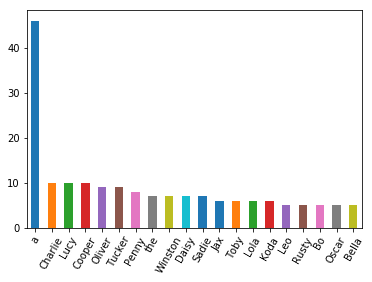

In [59]:
#Let's see a visual of the above.

common_names.plot(kind='bar')
plt.xticks(rotation=60)
plt.show();

Barring for the 'a' and the 'the' entries, the most popular names are Lucy, Charlie and Cooper. However, these are only margininally more common. It is possible that this graph could have resulted differently, if the 'none', 'a' and 'the' entries had been completely more accurately.

In [60]:
#Let's see what the most popular breed of dog was submitted.

popular_breeds = df_clean.is_breed.value_counts().nlargest(5)
popular_breeds

golden_retriever      156
labrador_retriever    106
pembroke               94
chihuahua              90
pug                    62
Name: is_breed, dtype: int64

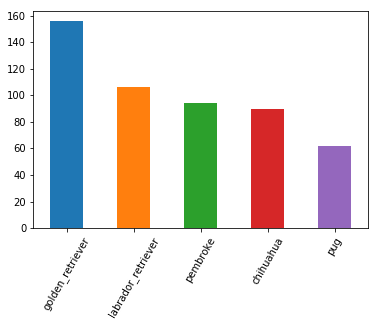

In [61]:
#Let's see a visual of the above.

popular_breeds.plot(kind='bar')
plt.xticks(rotation=60)
plt.show();

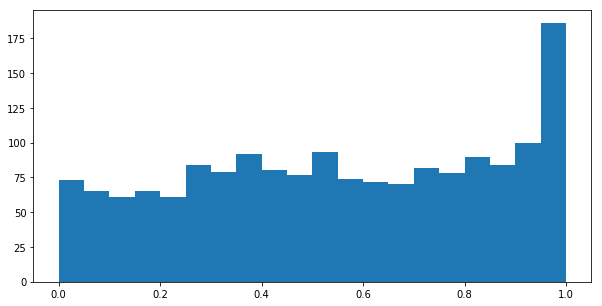

In [62]:
#Let's see a of the confidence levels of the AI's assessment of the images.

plt.rcParams['figure.figsize'] = [10, 5]

plt.hist(df_clean['is_dog_conf'], bins=20);

It can be clearly seen that the 'golden_retriever' breed was the most submitted breed in the database.

In looking at the range of the confidence levels of the AI's assessment of the images submitted, we can see that the AI's confidence level is primarily about 75% (majority being close to 100% confidence), so reliability can be placed on the AI's assessment.

In [63]:
#let's assess the ratings per the dataset

df_clean.revised_rating_numerator.describe()

count    1666.000000
mean       10.912365
std         2.666352
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: revised_rating_numerator, dtype: float64

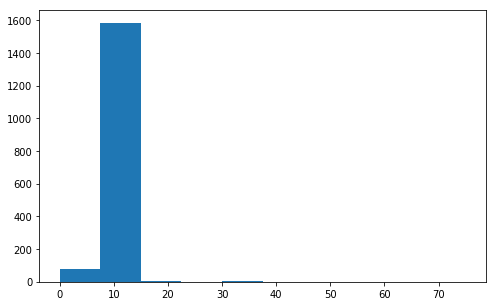

In [64]:
#Let's see a visual of the revised rating data

plt.rcParams['figure.figsize'] = [8, 5]

plt.hist(df_clean['revised_rating_numerator'], bins=10);

In [65]:
#Let's see how many entries have ratings above 15/10

len(df_clean[df_clean.revised_rating_numerator > 15]) / len(df_clean.revised_rating_numerator) *100

0.36014405762304924

In [66]:
#Let's see which entries have ratings above 15/10

df_clean[df_clean.revised_rating_numerator > 15]

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,revised_rating_numerator,is_dog_conf,is_breed,retweet_count,favorite_count
403,810984652412424192,2016-12-19 23:06:23,Sam,None,None,None,None,34,0.871342,golden_retriever,1655,5927
528,786709082849828864,2016-10-13 23:23:56,Logan,None,None,None,None,75,0.467321,pomeranian,7069,20296
700,758467244762497024,2016-07-28 01:00:57,None,None,None,None,None,43,0.436377,labrador_retriever,2539,5316
1399,684222868335505415,2016-01-05 04:00:18,None,None,None,None,None,19,0.791182,soft-coated_wheaten_terrier,1563,4225
1530,678389028614488064,2015-12-20 01:38:42,Bella,None,None,pupper,None,19,0.516284,miniature_pinscher,473,2044
1540,677716515794329600,2015-12-18 05:06:23,None,None,None,None,None,37,0.025438,chow,1104,3323


We are able to see that the worst rating is 0 whereas the best rating is 75 (Remember that we have normalised the ratings to ensure that they all had a common denominator e.g. being 10 so that we could compare the ratings more accurately).

Per a quick inspection, of a historgram graph, we could see that the ratings are right-skewed.

Only six entries have ratings above 15/10 (being 0.36% of the population).

The mean revised rating is 10.9.

### Visualization

When comparing the Retweet count to the Favourites count of the data, the following can be noted:
 - There appears to be a sudden burst in the begging;
 - There appears to be a steady incline over time;
 - The Favourites count increases at a faster rate than that of the Retweets count; and
 - Other than the faster rate of incline of the Favourites count, both seem to follow a similar pattern.

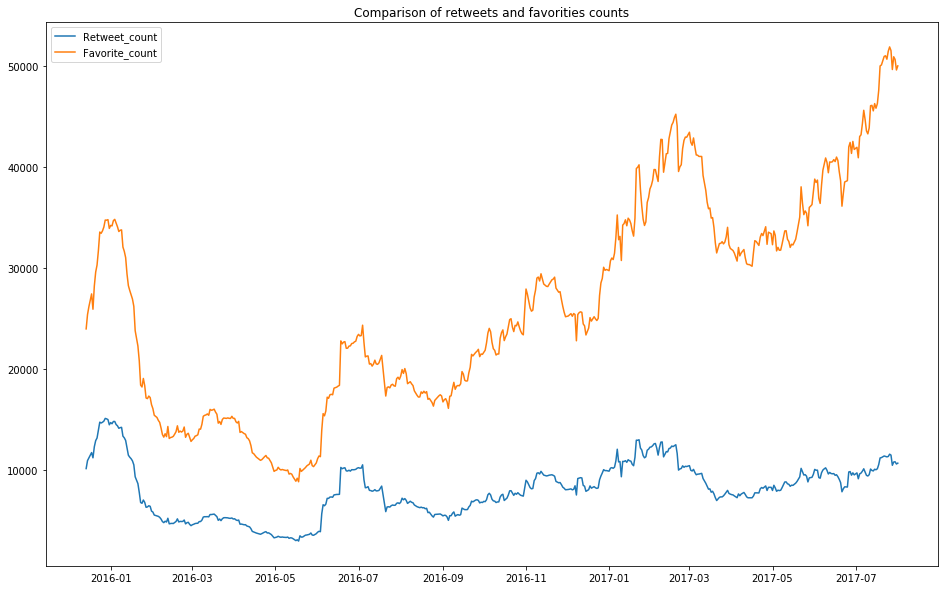

In [67]:
#Compare Retweets and Favourites over time

# retweets_count mean
df_twt = df_clean[['timestamp','retweet_count']].groupby(df_clean['timestamp'].dt.date).sum()
df_twt_mean = df_twt['retweet_count'].rolling(window=30).mean() #mean over a rolling 30 day period 

# favorites_count mean
df_fav = df_clean[['timestamp', 'favorite_count']].groupby(df_clean['timestamp'].dt.date).sum()
df_fav_mean = df_fav['favorite_count'].rolling(window=30).mean() #mean over a rolling 30 day period 

# Compare trends on a log scale for y axis
plt.rcParams['figure.figsize'] = [16,10]
plt.title('Comparison of retweets and favorities counts')
plt.plot(df_twt_mean, label='Retweet_count')
plt.plot(df_fav_mean, label='Favorite_count')
plt.legend()
plt.show()